<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
# autoreload updated and newly installed packages
# without having to restart Jupyter kernel
%load_ext autoreload
%autoreload 2
# Some little interaction with matplotlib
%matplotlib inline                
# Avoid using Jedi for faster autocomplete (tab)
%config Completer.use_jedi = False

## Crack growth analysis

### Hollow cylinder with crack on the external surface 

In [2]:
# Standard imports
import datetime
import platform
import os
import sys
from typing import List
# Non-standard imports
import matplotlib
import matplotlib.pyplot as plt
import numba as nb
import numpy as np
import pandas as pd
import plotly.graph_objs as go
# py-fatigue import
import py_fatigue as pf
import py_fatigue.testing as test

np.set_printoptions(threshold=sys.maxsize)

In [3]:
print(f"📁 Working Folder:         \033[34m\033[4m{os.getcwd()}\033[0m")
print(f"🐍 Python Version:         \033[32m\033[1m{sys.version}\033[0m")
print(f"🧪 \033[1mPy-Fatigue\033[0m Version:     \033[32m\033[1m{pf.__version__}\033[0m")
print(f"🐼 \033[1mPandas\033[0m Version:         \033[32m\033[1m{pd.__version__}\033[0m")
print(f"🔢 \033[1mNumPy\033[0m Version:          \033[32m\033[1m{np.__version__}\033[0m")
print(f"📊 \033[1mMatplotlib\033[0m Version:     \033[32m\033[1m{matplotlib.__version__}\033[0m")
print(f"🚀 \033[1mNumba\033[0m Version:          \033[32m\033[1m{nb.__version__}\033[0m")


📁 Working Folder:         /home/pietro.dantuono@24SEA.local/Projects/MAXWind/py_fatigue/notebooks
🐍 Python Version:         3.13.1 (main, Jan 14 2025, 22:47:38) [Clang 19.1.6 ]
🧪 Py-Fatigue Version:     2.0.2
🐼 Pandas Version:         2.2.3
🔢 NumPy Version:          2.1.3
📊 Matplotlib Version:     3.10.1
🚀 Numba Version:          0.61.0


In [4]:
plt.rcParams['figure.figsize'] = (7, 4)
plt.rcParams["font.family"] = ["monospace"]
plt.rcParams["font.size"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.color'] = "#E4E8EE"
plt.rcParams['grid.linestyle'] = "-"
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = True

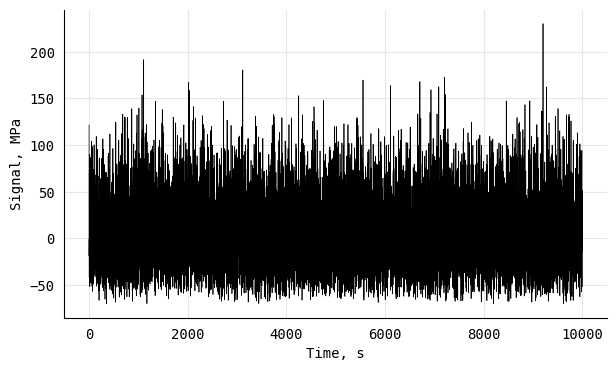

In [5]:
import py_fatigue.testing as test

# Simulate a random signal
t = test.get_sampled_time(duration=10000, fs=1)
s = test.get_random_data(
    t=t, min_=-70, range_=300, random_type="weibull", a=2., seed=41
)

# Plot the signal
plt.plot(t, s, 'k', lw=0.5)
plt.xlabel("Time, s")
plt.ylabel("Signal, MPa")
plt.show()


In [6]:
# Generating the timeseries dictionary
timeseries = {
    "data": s,
    "time": t,
    "timestamp": datetime.datetime(2020, 1, 1, tzinfo=datetime.timezone.utc),
    "name": "One week time series",
    "range_bin_width":  5.0,
    "mean_bin_width":  5.0,
}
# Creating the CycleCount object
cc = pf.CycleCount.from_timeseries(**timeseries)
cc

,One week time series
Cycle counting object,
"largest full stress range, MPa",250.256654
"largest stress range, MPa",300.0
number of full cycles,3335
number of residuals,18
number of small cycles,0
stress concentration factor,N/A
residuals resolved,False
mean stress-corrected,No


If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,One week time series
Cycle counting object,
"largest full stress range, MPa",222.3476
"largest stress range, MPa",272.0
number of full cycles,3335
number of residuals,18
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,DNVGL-RP-C203: {'detail_factor': 0.6}


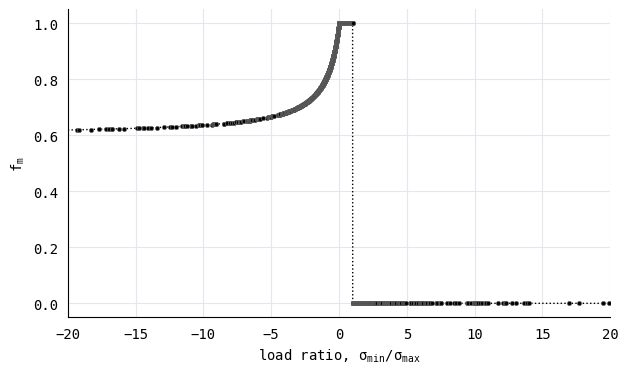

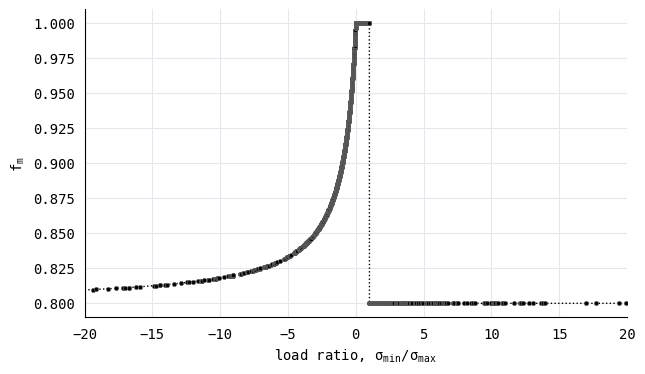

In [7]:
cc_corr_6 = cc.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.6,
)
cc_corr_8 = cc.mean_stress_correction(
  correction_type = "DNVGL-RP-C203",
  plot = True,
  detail_factor=0.8,
)
cc_corr_6

invalid value encountered in power
If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,One week time series
Cycle counting object,
"largest full stress range, MPa",144.873477
"largest stress range, MPa",177.969627
number of full cycles,3335
number of residuals,18
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,WALKER: {'gamma': 0.6}


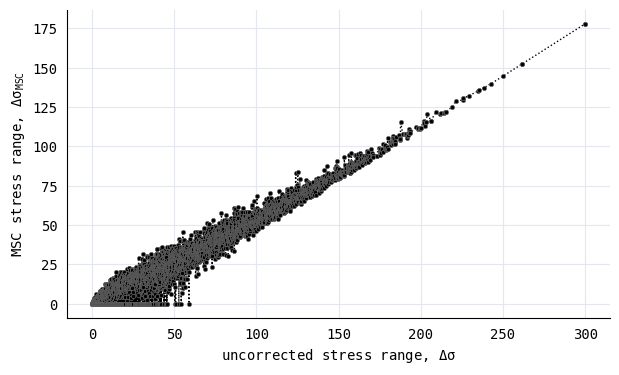

In [8]:
cc_corr_walk = cc.mean_stress_correction(
  correction_type = "walker",
  plot = True,
  gamma=0.6,
)
cc_corr_walk

Multiple output load ratios provided!
Only the first one (r_out=-5.0) will be used in the mean stress-corrected CycleCount instance creation, while the others will be used for plotting purposes.


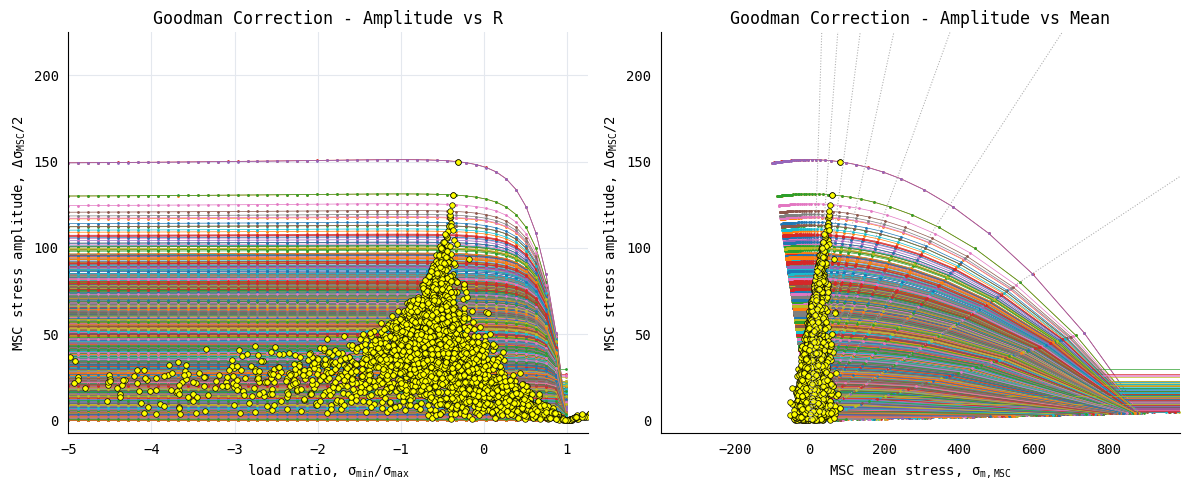

If mean stress correction is performed in the contest of long-term fatigue analysis, please perform the sum of multiple CycleCount instances prior mean stress correction (MSC).
In fact, applying the MSC before summing into long-term CycleCount instance results in non-conservative life estimates, as after MSC, low-frequency fatigue cannot be estimated accurately.


,One week time series
Cycle counting object,
"largest full stress range, MPa",249.069287
"largest stress range, MPa",298.688614
number of full cycles,3335
number of residuals,18
number of small cycles,0
stress concentration factor,N/A
residuals resolved,True
mean stress-corrected,"GENERIC-HAIGH: {'r_out': array([-5. , -4.88..."


In [19]:
cc_corr_good = cc.mean_stress_correction(
  correction_type = "generic-haigh",
  plot = True,
  r_out=np.linspace(-5, 0.99, 51),
  ult_s=900,
  correction_exponent=2,
)
cc_corr_good